In [1]:
from collections import defaultdict
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Automat skończony

In [2]:
class dfa():
    def __init__(self, pattern, table=None):
        self.state = 0
        if table is None:
            self.table = self.transition_table(pattern)
        else:
            self.table = table
        
    @staticmethod
    def transition_table(pattern):
        table = [defaultdict(lambda: 0) for l in pattern]
        table.append(defaultdict(lambda: 0)) # for final state
        alphabet = [letter.tostring() for letter in np.unique(list(pattern), axis=0)]
        pattern = [p.tostring() for p in pattern]
        for i in range(len(pattern)):
            for letter in alphabet:
                k = i
                while k>=0:
                    if np.all(pattern[0:k]== pattern[i-k:i]) and np.all(pattern[k] == letter):
                        table[i][letter] = k + 1
                        break
                    k -= 1
        for i in range(1, len(pattern)):     
            if np.all(pattern[0:i] == pattern[-i:]): 
                table[-1][pattern[0]] = i

        return table
        
    def next_state(self, item):
        self.state = self.table[self.state][item.tostring()]
        return self.state
    
    def reset(self):
        self.state = 0

# Wyszukiwanie wzorca
przechodzenie automatem (w którym stan odpowiada dopasowaniu rzędu z wzorca) po przeszukiwanej macierzy

In [3]:
class RectPatternDetector():
    def __init__(self, pattern, automaton=None):
        self.pattern = pattern
        if automaton is None:
            self.automaton = dfa([pattern[i,:] for i in range(pattern.shape[0])])
        else:
            self.automaton = automaton
        
    def next_state(self, item):
        self.state = self.automaton.next_state(item)
        return self.state
         
    def is_last(self, state):
        return state == len(self.table) + 1
    
    def find(self, search_space):
        h, w = search_space.shape
        result = np.zeros((h,w))
        ph, pw = self.pattern.shape
        for j in range(pw-1, w):
            for i in range(h):
                result[i, j] = self.next_state(search_space[i, (j+1)-pw:(j+1)])
            self.automaton.reset()
        return result

In [4]:
with open("haystack.txt", "r") as file:
    lines = file.readlines()

In [5]:
# simple search for "t h" pattern in 2 consecutive lines
last = -3
ll = ""
for i, line in enumerate(lines):
    if "t h" in line:
        if(i - last) == 1:
            print(ll[:-1], np.char.find(ll, "t h"))
            print(line[:-1], np.char.find(line, "t h"))
            print()
        last = i
        ll = line

provide facilities for t h e manipulation of texts. Such systems usually process 23
objects t h a t are quite large. For example, this book probably contains more 8

objects t h a t are quite large. For example, this book probably contains more 8
t h a n a million characters. Text algorithms occur in many areas of science and 0

t h a t if inflected forms are considered. In French, inflected forms produce more 0
t h a n 700,000 words. T h e representation of lexicons of this size makes the 0

it helps to find typing errors. T h e lexicon used by spell contains approxi- 1
mately 70,000 entries stored within less t h a n 60 kilobytes of random-access 41



# Znajdywanie 2-wymiarowego wzorca w tekście

In [6]:
def find_text(lines, pattern_list, show_result=True):
    "prints matching lines and returns number of matches"
    
    # converting text to np.array
    line_size = max(map(lambda x: len(x), lines))
    n = len(lines)
    text = np.zeros((n,line_size), dtype=np.character)
    for i, line in enumerate(lines):
        for j in range(len(line)):
            text[i, j] = line[j]
            
    # converting pattern to np.array
    pattern = np.zeros((2, len(pattern_list[0])), dtype=np.character)
    for i in range(len(pattern_list)):
        for j in range(len(pattern_list[0])):
            pattern[i, j] = pattern_list[i][j]
            
    # seraching for pattern
    result = RectPatternDetector(pattern).find(text) == len(pattern_list)
    
    # processing results
    h, w = pattern.shape
    idx = np.where(np.any(result, axis=1))[0]
    if show_result:
        for i in idx:
            txt = map(lambda x: x.tolist(), list(text[i+1-h:i+1]))
            txt = ["".join(list(map(lambda x: x.decode(), line))) for line in txt]
            print("".join(txt))
            print()
    return np.sum(result)
        
find_text(lines, ["t h"] * 2)

t h a t if inflected forms are considered. In French, inflected forms produce more
t h a n 700,000 words. T h e representation of lexicons of this size makes the




1

In [7]:
find_text(lines, ["th"] * 2)

0

In [8]:
find_text(lines, ["p a t t e r n"])

who wants all entries related to the n a m e "Marie-Curie-Sklodowska." This is
a n example of a p a t t e r n matching problem, or string matching. In this case,


a n example of a p a t t e r n matching problem, or string matching. In this case,
the n a m e "Marie-Curie-Sklodowska" is the p a t t e r n . Generally we m a y want to


find a string called a pattern of length m inside a text of length n, where n is
greater t h a n m. T h e p a t t e r n can be described in a more complex way to denote


a set of strings and not just a single word. In many cases n is very large. In
genetics the p a t t e r n can correspond to a gene t h a t can be very long; in image



T h e search of words or p a t t e r n s in static texts is quite a different question




5

### Znajdowanie tych samych liter sąsiadujących w pionie

In [9]:
for l in ascii_letters:
    count = find_text(lines, [l, l], show_result=False)
    print(f"Letter: {l} | count={count}")
    print(f"count={count}\n\n" + "-"*40)

Letter: a | count=26
count=26

----------------------------------------
Letter: b | count=0
count=0

----------------------------------------
Letter: c | count=6
count=6

----------------------------------------
Letter: d | count=1
count=1

----------------------------------------
Letter: e | count=46
count=46

----------------------------------------
Letter: f | count=2
count=2

----------------------------------------
Letter: g | count=0
count=0

----------------------------------------
Letter: h | count=4
count=4

----------------------------------------
Letter: i | count=13
count=13

----------------------------------------
Letter: j | count=0
count=0

----------------------------------------
Letter: k | count=0
count=0

----------------------------------------
Letter: l | count=5
count=5

----------------------------------------
Letter: m | count=5
count=5

----------------------------------------
Letter: n | count=15
count=15

----------------------------------------
Letter: o | 

# Znajdowanie wzorca w obrazie

In [10]:
def find_img(img, pattern, plot=True, margin=0, automaton=None):
    "returns lines with pattern and total count"
    result = RectPatternDetector(pattern, automaton=None).find(img) == pattern.shape[0]
    count = np.sum(result)
    h, w = pattern.shape
    idx = np.where(np.any(result, axis=1))[0]
    if plot:
        for i in idx:
            plt.figure(figsize=(10,2))
            j = np.where(result[i,:])[0][0]
            plt.imshow(img[i-h:i,j-margin-w:j+margin])
            plt.axis('off')
            plt.show()
    return idx, count

In [11]:
img = np.array(Image.open("haystack.png").convert('L'))

## poszukiwanie liter 'a', 'r', 'n', 'l',

In [12]:
patterns = [(l, np.array(Image.open(f"{l}.png").convert('L'))) for l in "arnl"]

In [13]:
for letter, pattern in patterns:
    _, count = find_img(img, pattern, plot=False)
    txt_count = len(list(filter(lambda x: x==letter, "".join(lines))))
    print(f"letter '{letter}' was matched {count} times (out of {txt_count})")

letter 'a' was matched 397 times (out of 397)
letter 'r' was matched 335 times (out of 339)
letter 'n' was matched 331 times (out of 339)
letter 'l' was matched 173 times (out of 175)


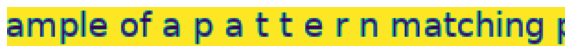

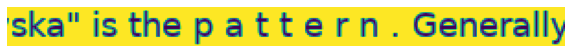

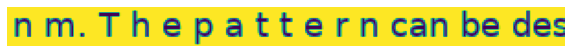

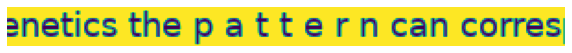

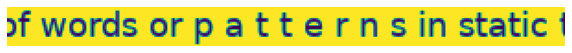

5

In [14]:
pattern = np.array(Image.open("pattern.png").convert('L'))
_, count = find_img(img, pattern, plot=True, margin=100)
count

# Porównanie czasu działania dla różnych wielkości wzorca

In [15]:
pattern.shape
automaton = dfa([pattern[i,:] for i in range(pattern.shape[0])])

In [16]:
%%timeit
dfa([pattern[i,:] for i in range(pattern.shape[0])])

14.9 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
find_img(img, pattern, plot=False, automaton=automaton)

2.02 s ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
patterns[0][1].shape
automaton = dfa([patterns[0][1][i,:] for i in range(patterns[0][1].shape[0])])

In [19]:
%%timeit
dfa([patterns[0][1][i,:] for i in range(patterns[0][1].shape[0])])

5.08 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
find_img(img, pattern, plot=False, automaton=automaton)

2.01 s ± 52.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
big_pattern = np.random.randint(0, 255, (150,150))
automaton = dfa([big_pattern[i,:] for i in range(big_pattern.shape[0])])

In [22]:
%%timeit
dfa([big_pattern[i,:] for i in range(big_pattern.shape[0])])

10 s ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
find_img(img, pattern, plot=False, automaton=automaton)

2.4 s ± 380 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Porównanie czasu działania dla podzielonego obrazu

W podzielonym obrazie potencjalnie tracimy wystąpienia wzorca znajdujące się na nowopowstałych krawędziach

In [24]:
def fragment(img, n):
    part = (img.shape[0] + 1) // n
    return [img[i*part:(i+1)*part] for i in range(n)]
    
automaton = dfa([patterns[0][1][i,:] for i in range(patterns[0][1].shape[0])])
fragments = fragment(img, 2)

In [25]:
%%timeit
for fragment in fragments:
    find_img(fragment, pattern, plot=False, automaton=automaton)

2.57 s ± 485 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
fragments = fragment(img, 4)

In [27]:
%%timeit
for fragment in fragments:
    find_img(fragment, pattern, plot=False, automaton=automaton)

2.41 s ± 279 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
fragments = fragment(img, 8)

In [29]:
%%timeit
for fragment in fragments:
    find_img(fragment, pattern, plot=False, automaton=automaton)

2.57 s ± 561 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
